In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Load the CSV file
csv_file = "../../data/diabetes_012_health_indicators_BRFSS2015.csv"
data = pd.read_csv(csv_file, sep=',')

print(data.head())

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

In [2]:
train_data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,...,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000
mean,0.297545,0.428212,0.423664,0.962748,28.371866,0.442866,0.040578,0.094238,0.757081,0.634407,...,0.951026,0.084107,2.511831,3.192718,4.248788,0.168303,0.440427,8.032827,5.050620,6.052611
std,0.698850,0.494821,0.494140,0.189378,6.612385,0.496726,0.197310,0.292160,0.428848,0.481597,...,0.215814,0.277549,1.068240,7.426642,8.720909,0.374136,0.496440,3.053086,0.986706,2.072342
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [3]:
for value in train_data['Diabetes_012'].unique():
    print(train_data[train_data['Diabetes_012'] == value].describe())

       Diabetes_012         HighBP       HighChol      CholCheck  \
count      170908.0  170908.000000  170908.000000  170908.000000   
mean            0.0       0.370498       0.379350       0.957176   
std             0.0       0.482939       0.485227       0.202461   
min             0.0       0.000000       0.000000       0.000000   
25%             0.0       0.000000       0.000000       1.000000   
50%             0.0       0.000000       0.000000       1.000000   
75%             0.0       1.000000       1.000000       1.000000   
max             0.0       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  170908.000000  170908.000000  170908.000000         170908.000000   
mean       27.728497       0.429102       0.031514              0.071658   
std         6.253196       0.494949       0.174703              0.257922   
min        12.000000       0.000000       0.000000              0.000000   
25%    

In [4]:
import plotly.express as px

# Liste des variables binaires (0 ou 1)
binary_features = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
    'NoDocbcCost', 'DiffWalk', 'Sex'
]

dataDiabete = train_data.copy()


dataDiabete = dataDiabete.replace({'Diabetes_012' : {float(0): 'Non-diabétique', float(1): 'Prédiabète', float(2): 'Diabétique'}})

features = [col for col in dataDiabete.columns if col != 'Diabetes_012']
features = [col for col in features if col not in binary_features]

for feature in binary_features:
    mean_by_group = dataDiabete.groupby('Diabetes_012')[feature].mean().reset_index()
    fig = px.bar(
        mean_by_group,
        x='Diabetes_012',
        y=feature,
        color='Diabetes_012',
        title=f'Moyenne de {feature} par groupe de diabète',
        labels={feature: 'Moyenne', 'Diabetes_012': 'Groupe de diabète'}
    )
    fig.update_layout(
        yaxis_title='Moyenne (0-1)',
        xaxis_title='Groupe de diabète',
        yaxis_range=[0, 1]
    )
    fig.show()

for feature in features:
    mean_by_group = dataDiabete.groupby('Diabetes_012')[feature].mean().reset_index()
    fig = px.bar(
        mean_by_group,
        x='Diabetes_012',
        y=feature,
        color='Diabetes_012',
        title=f'Moyenne de {feature} par groupe de diabète',
        labels={feature: 'Moyenne', 'Diabetes_012': 'Groupe de diabète'}
    )
    fig.update_layout(
        yaxis_title='Moyenne',
        xaxis_title='Groupe de diabète'
    )
    fig.show()

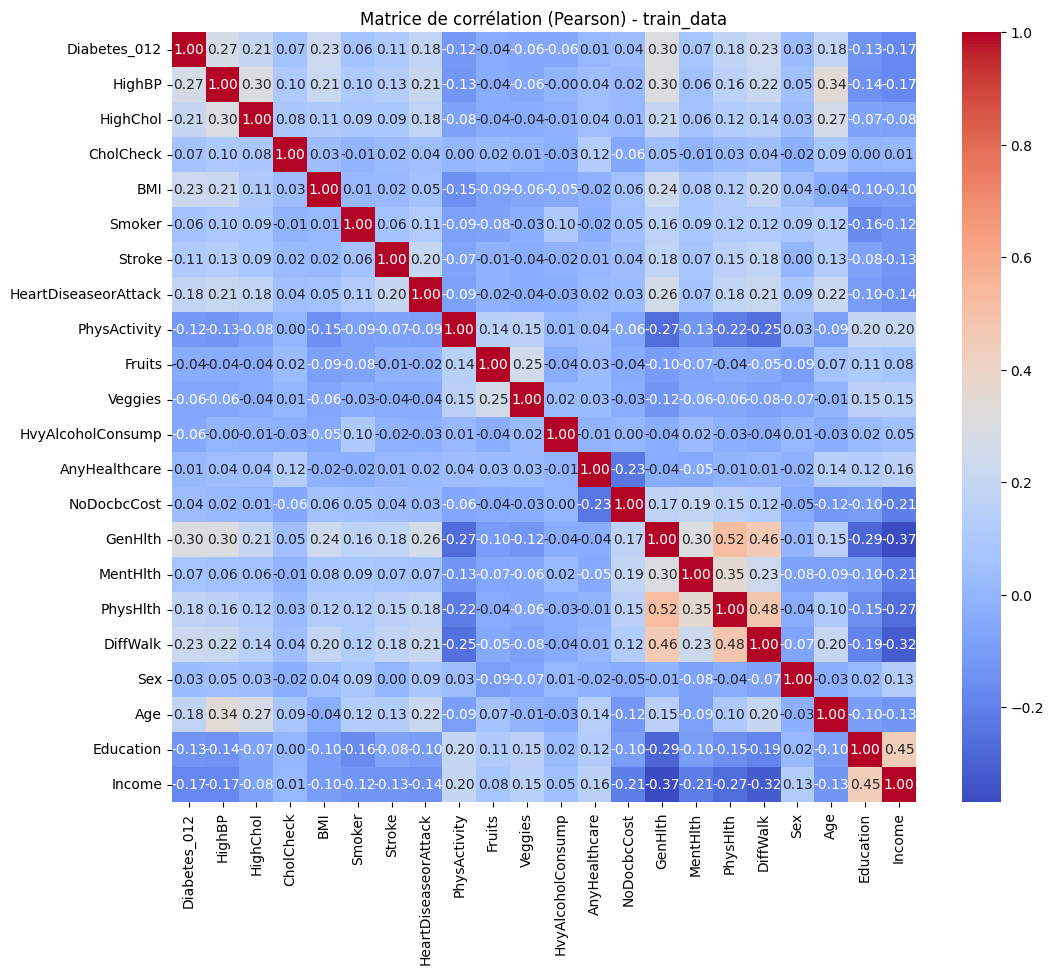

In [5]:
import seaborn as sns

# Matrice de corrélation de Pearson sur les variables numériques du train_data
corr_matrix = train_data.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matrice de corrélation (Pearson) - train_data")
plt.show()

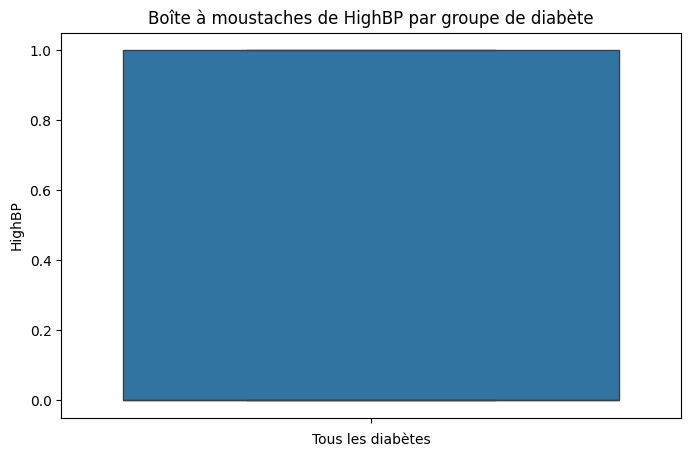

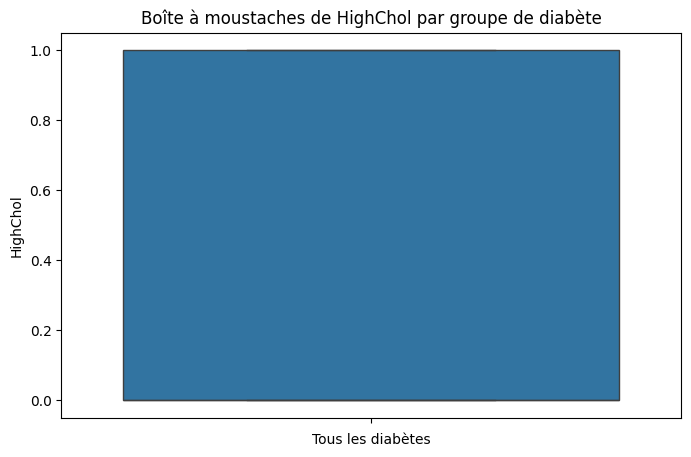

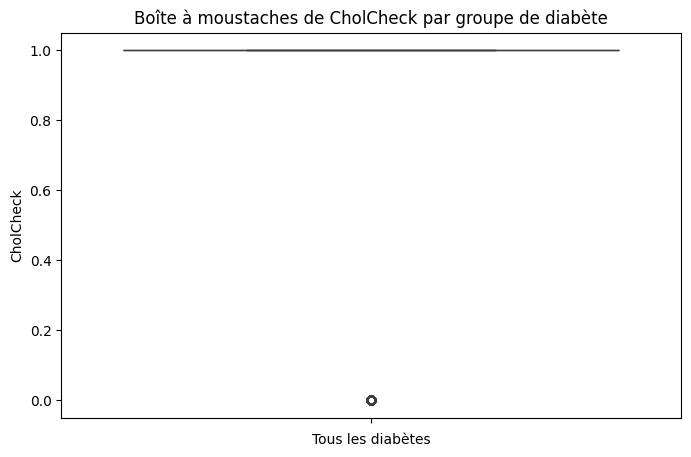

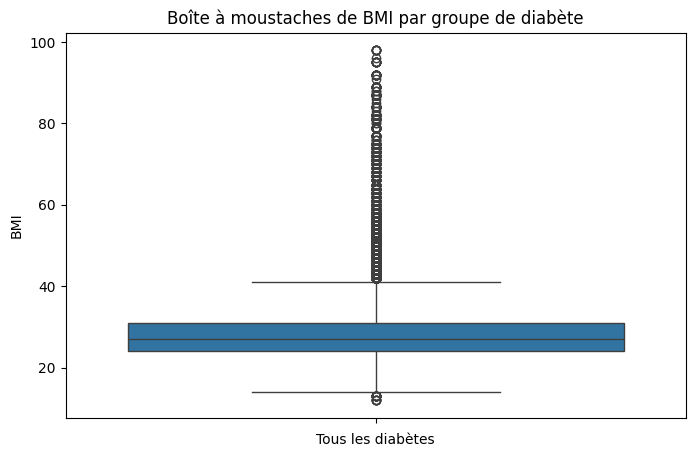

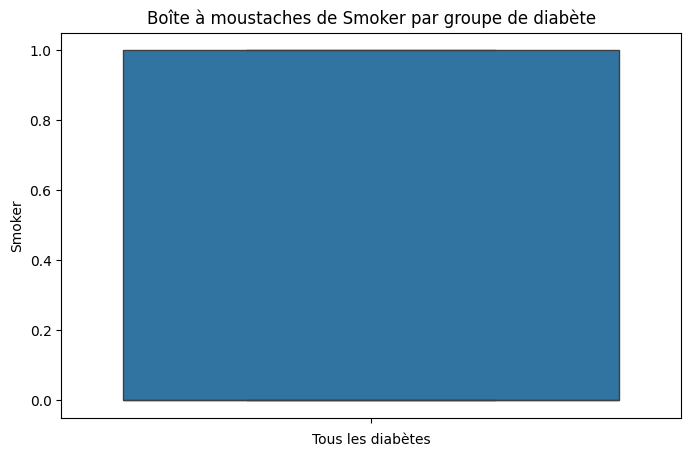

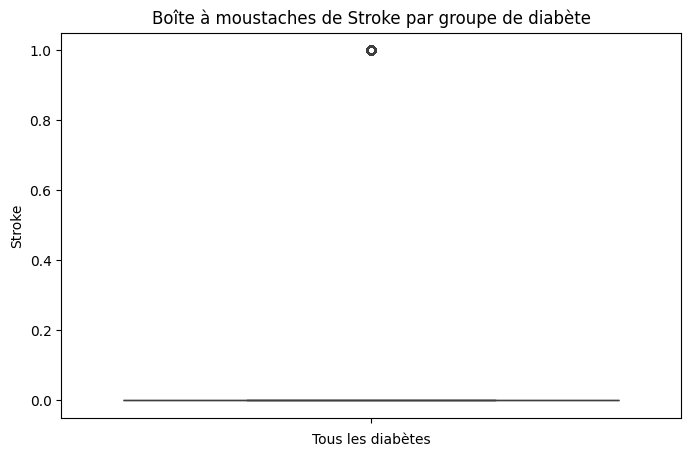

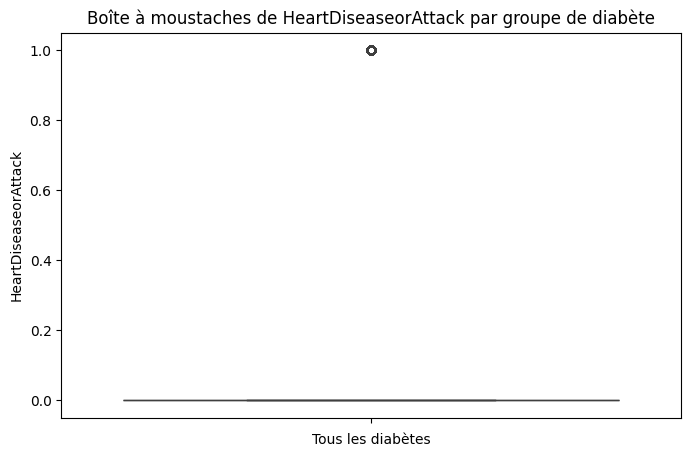

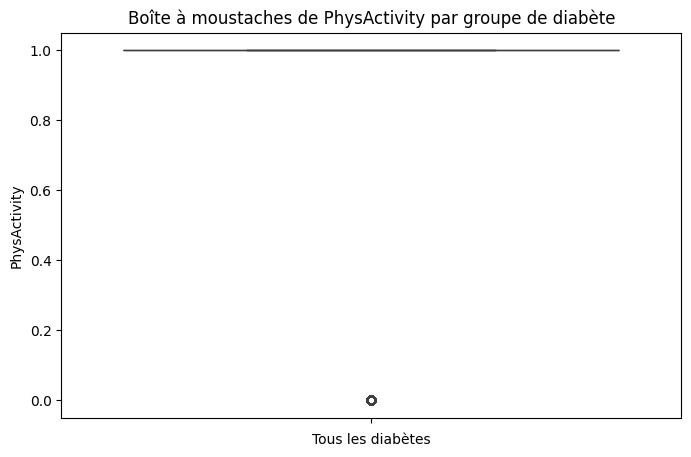

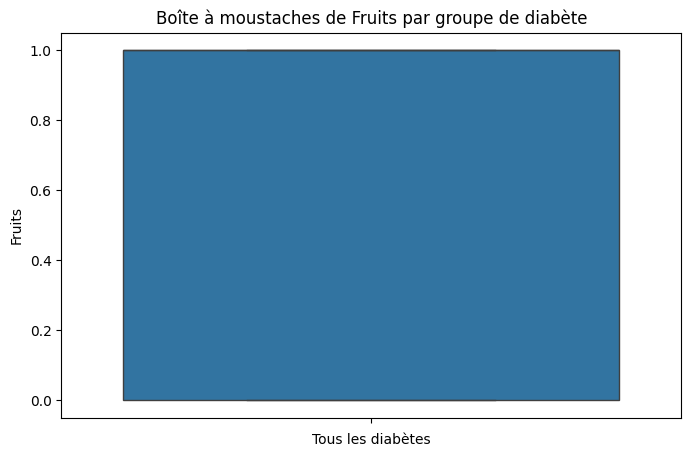

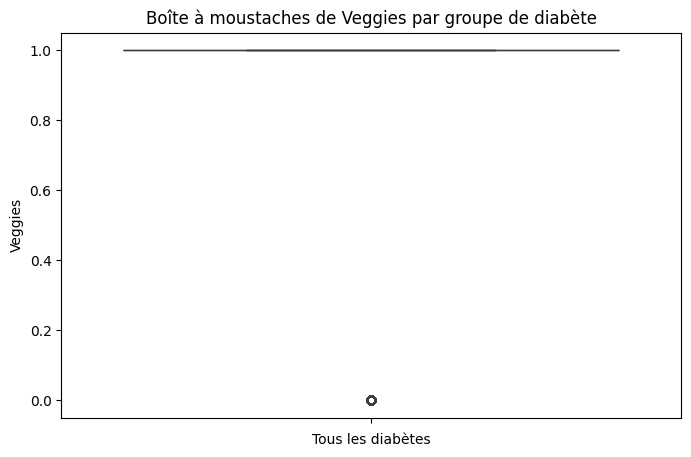

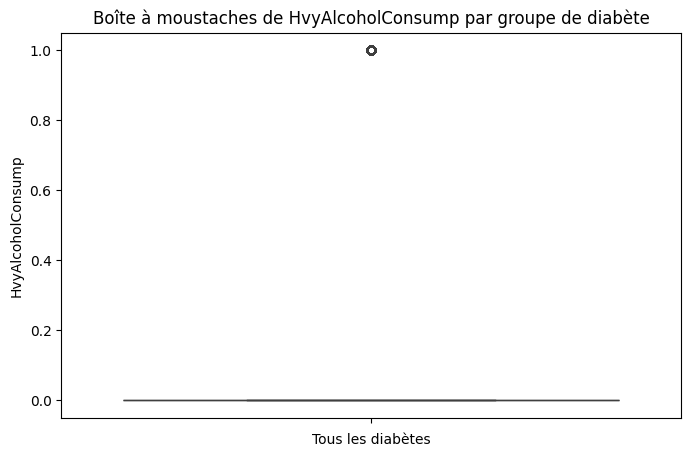

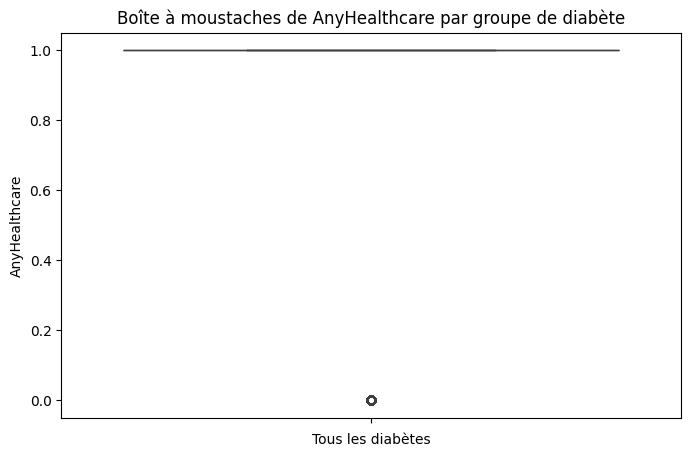

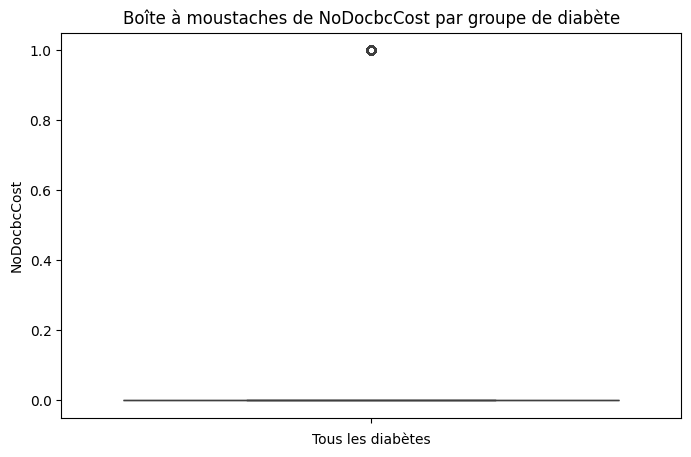

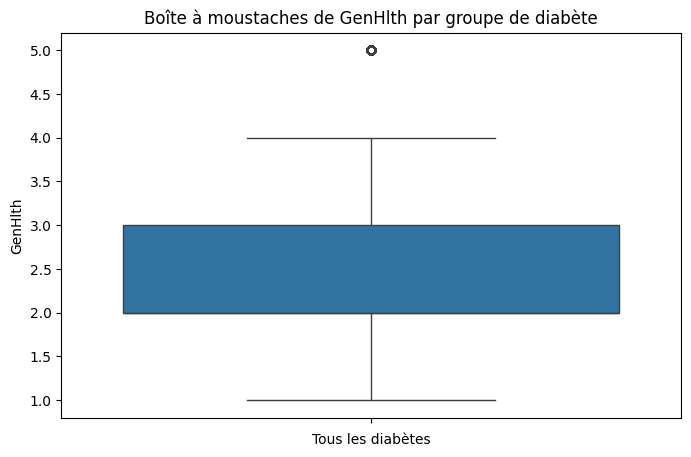

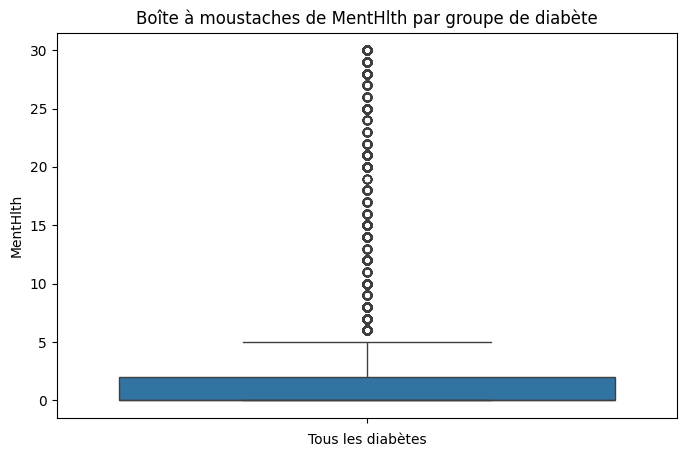

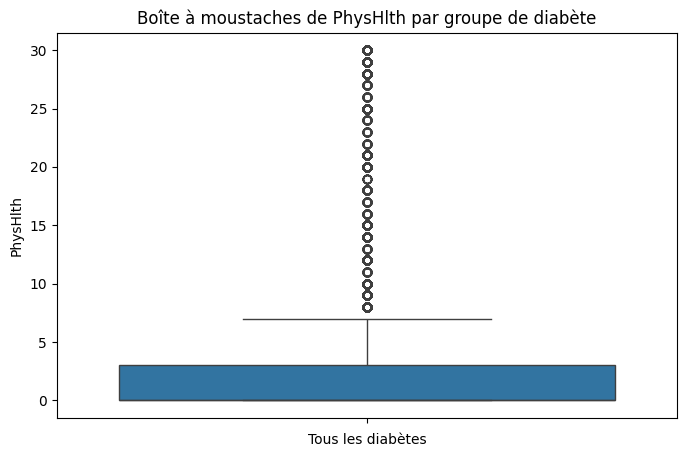

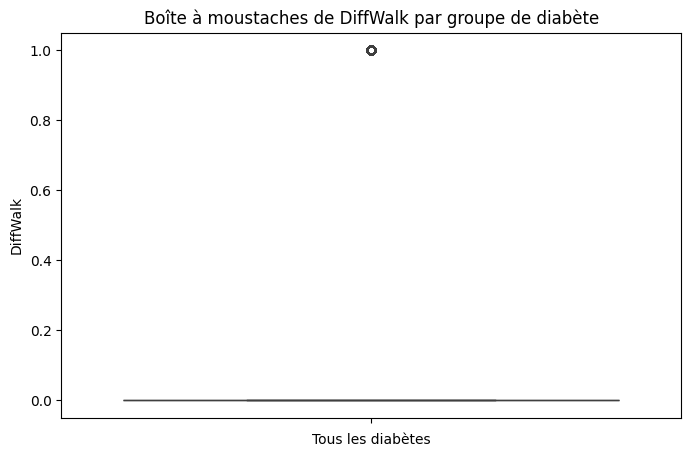

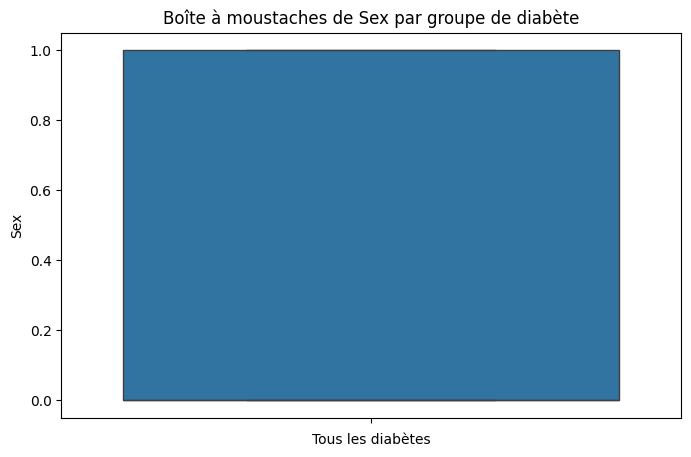

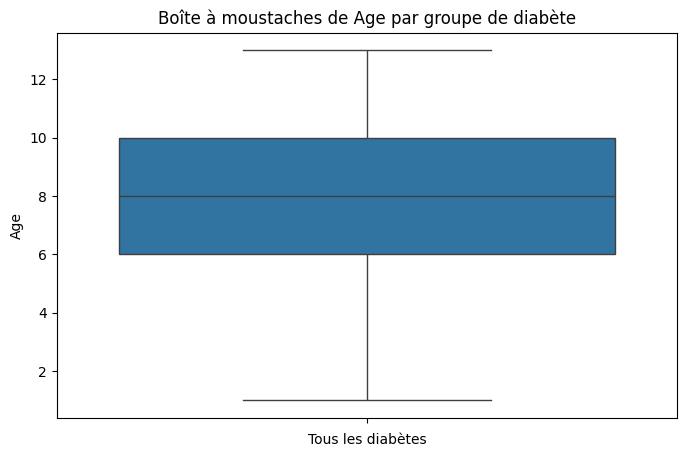

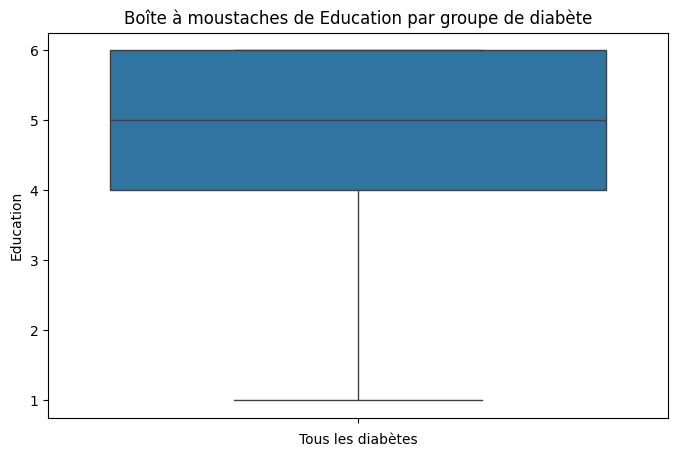

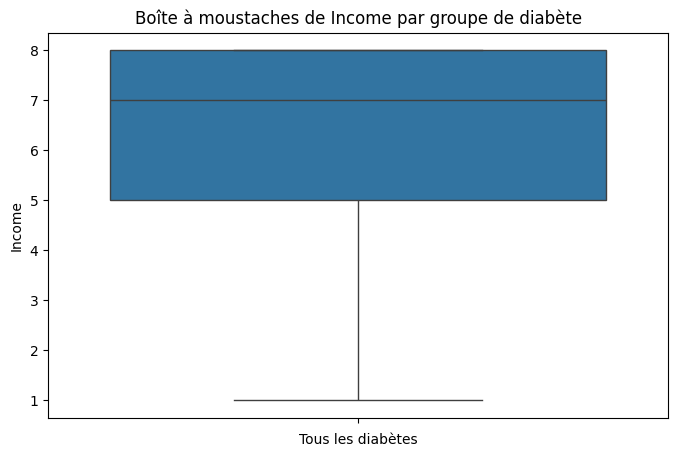

In [6]:
import seaborn as sns

# Boîtes à moustaches (boxplots) pour chaque paramètre numérique par groupe de diabète

# On utilise dataDiabete pour avoir les labels de groupe
numeric_features = [col for col in dataDiabete.columns if col != 'Diabetes_012']

for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=feature, data=dataDiabete)
    plt.title(f'Boîte à moustaches de {feature} par groupe de diabète')
    plt.xlabel('Tous les diabètes')
    plt.ylabel(feature)
    plt.show()

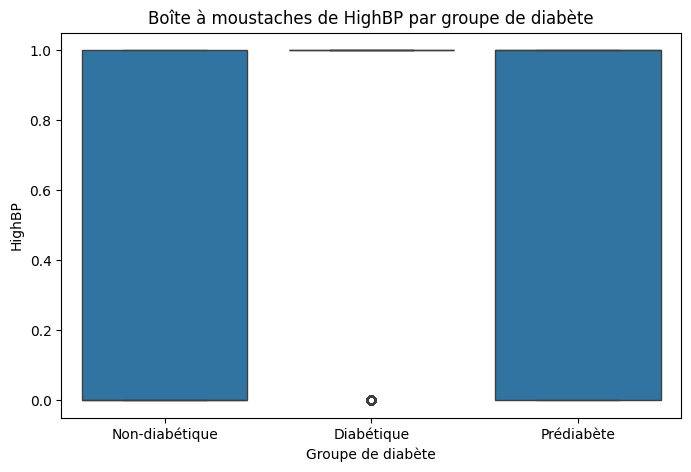

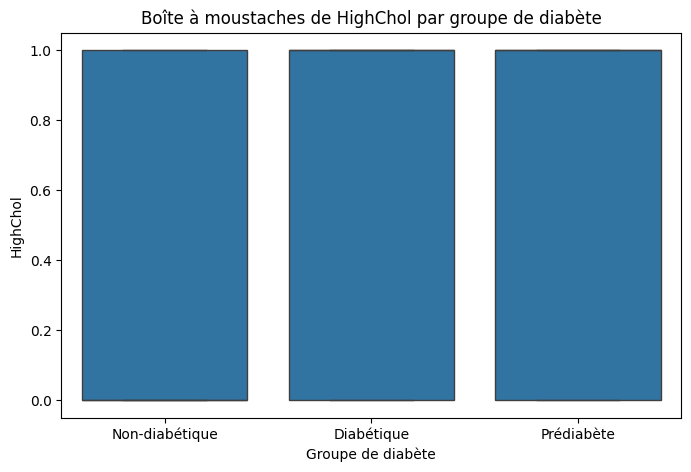

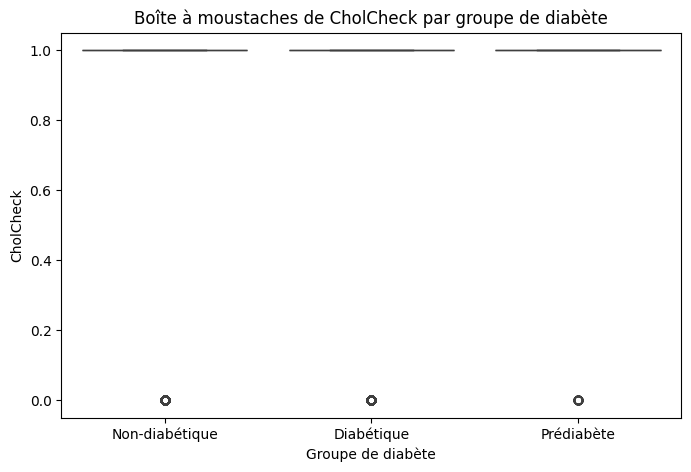

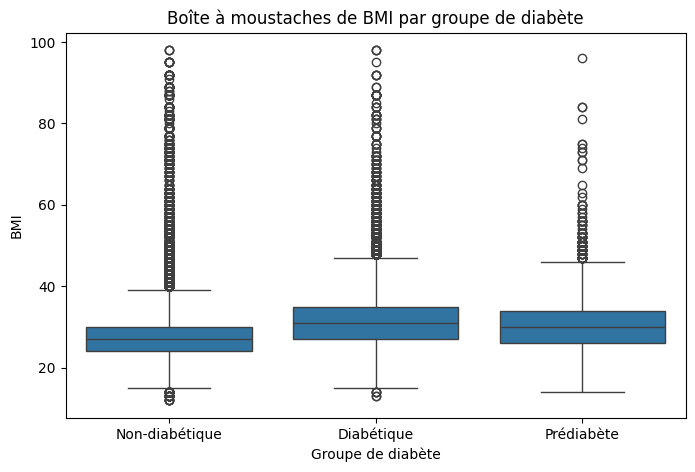

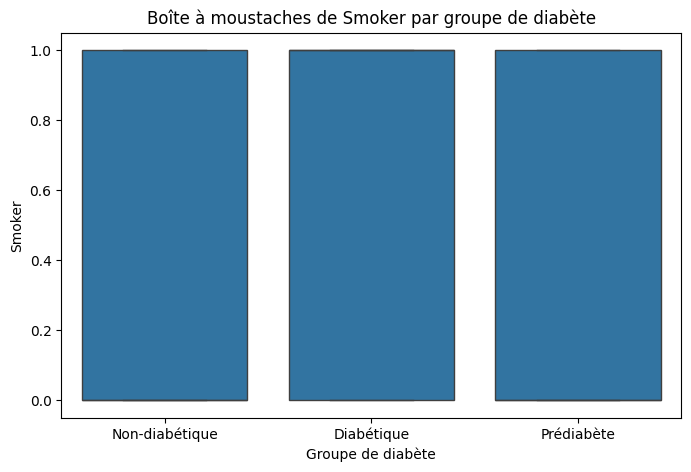

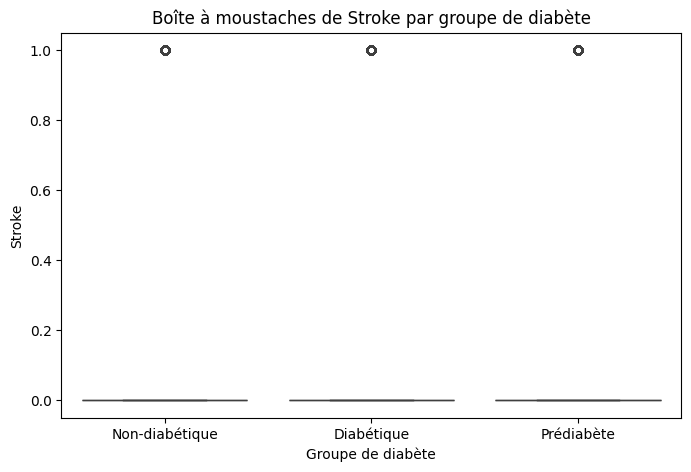

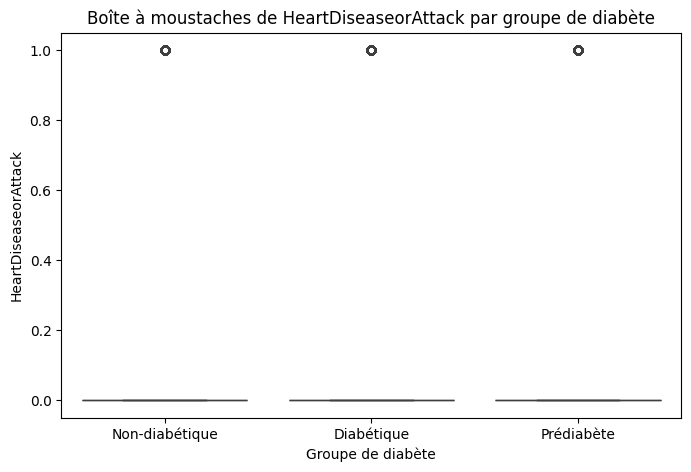

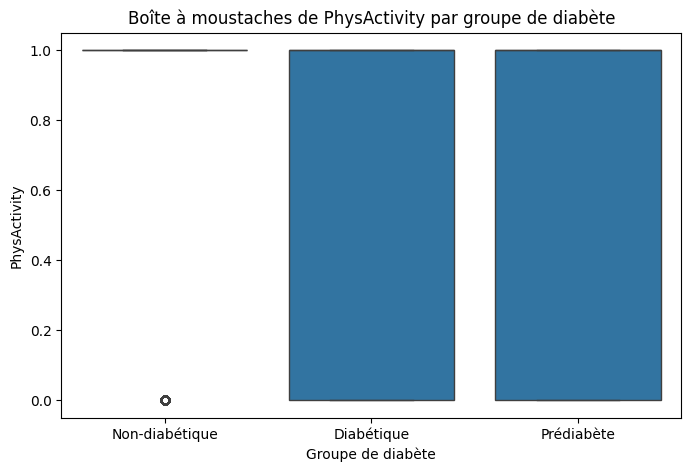

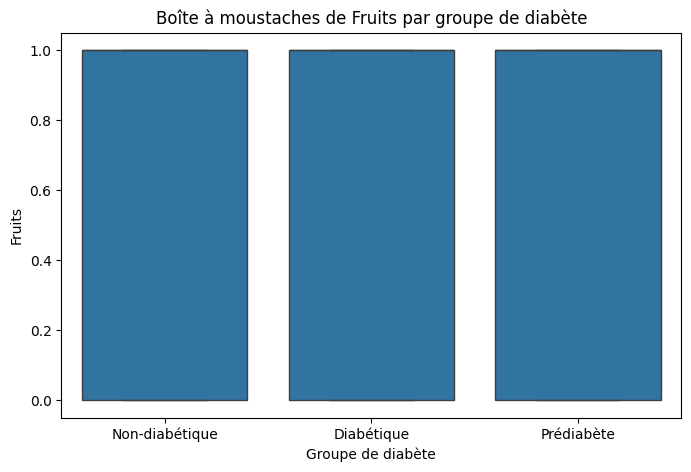

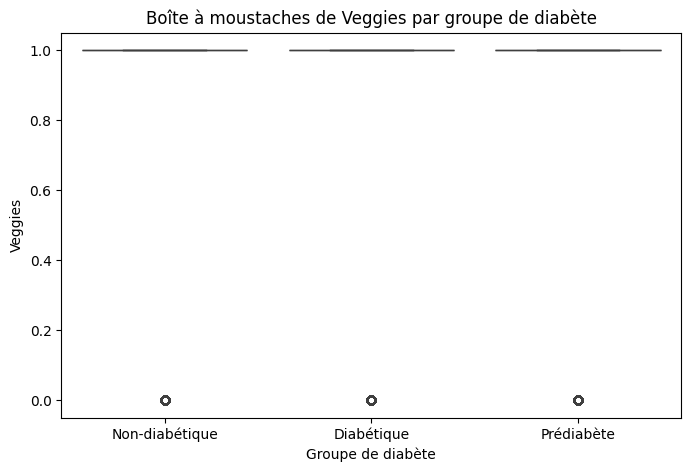

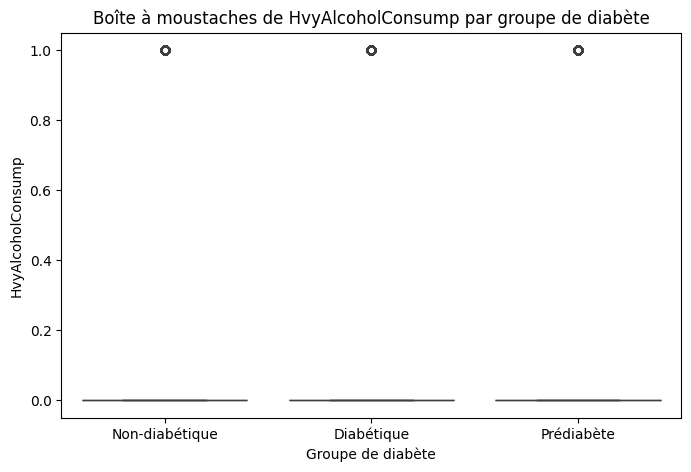

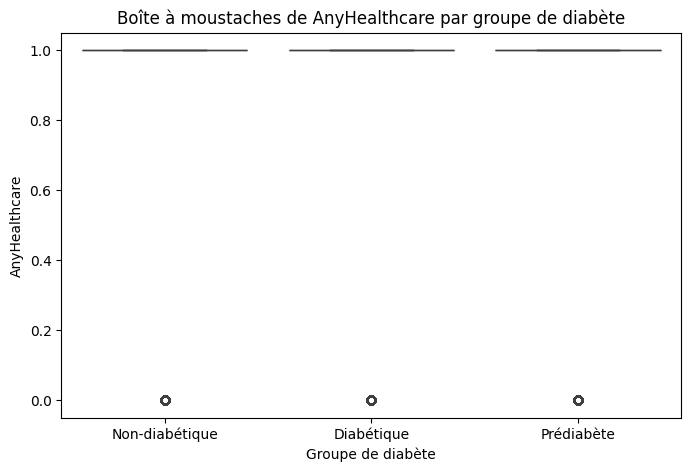

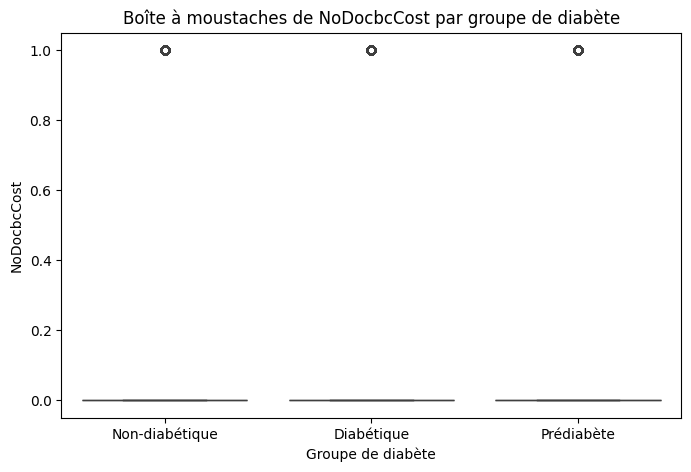

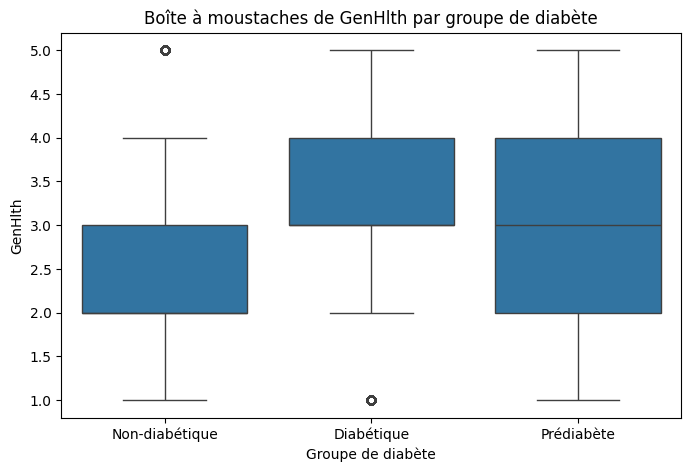

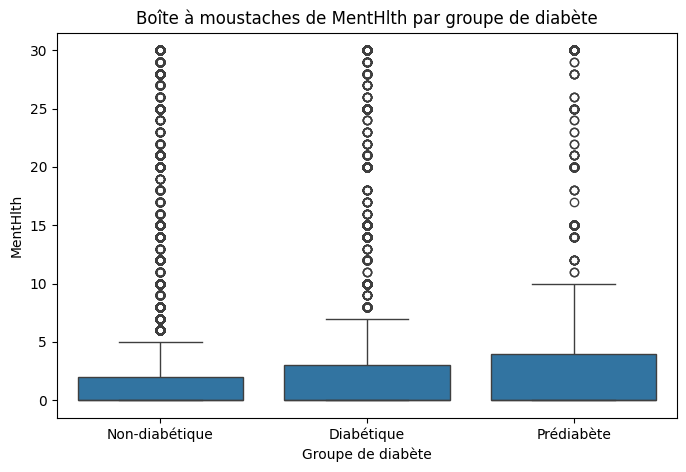

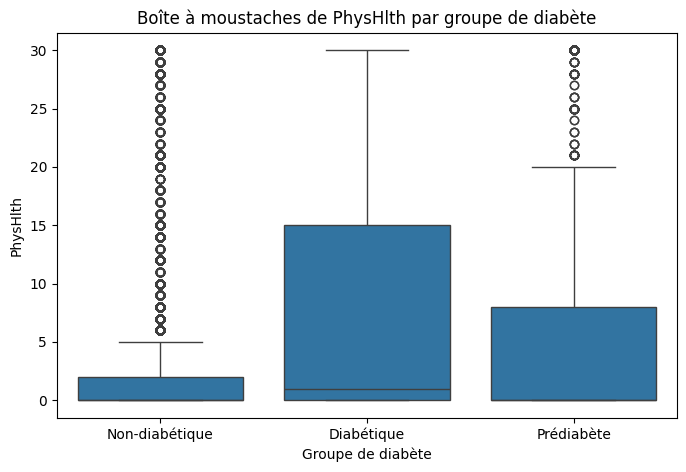

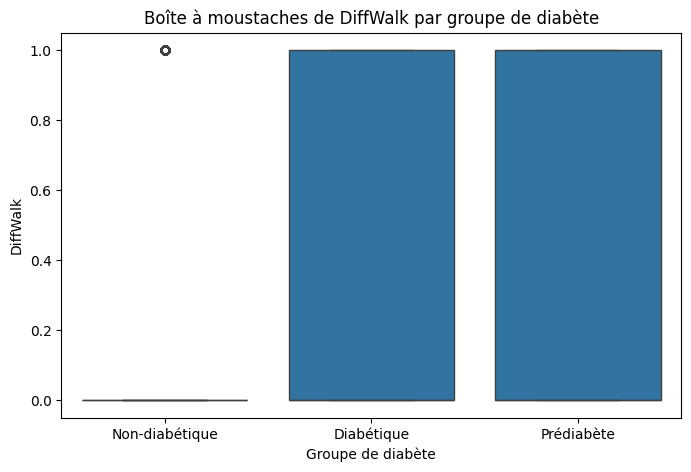

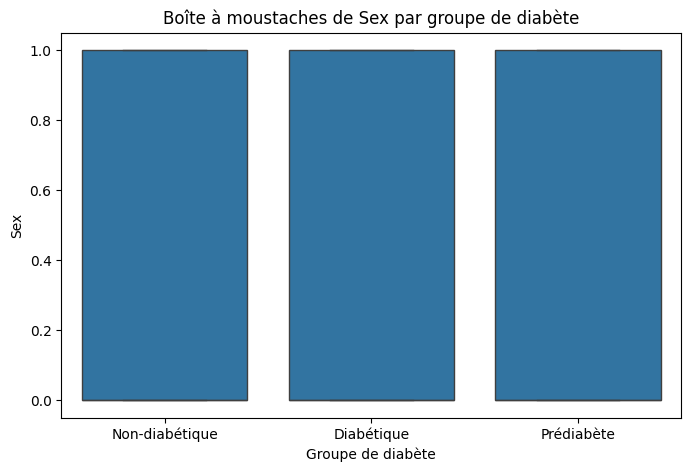

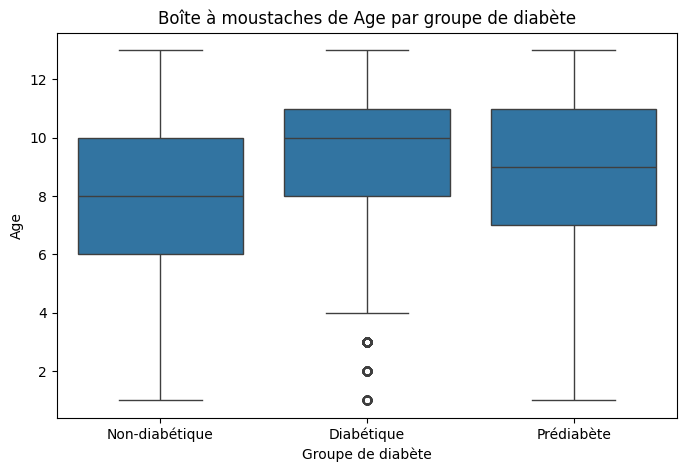

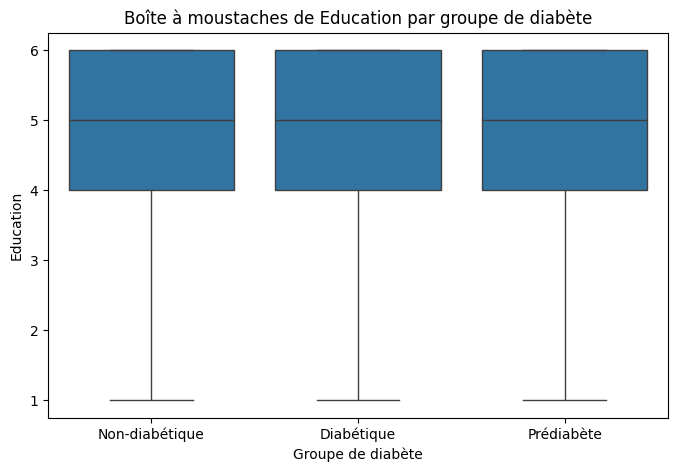

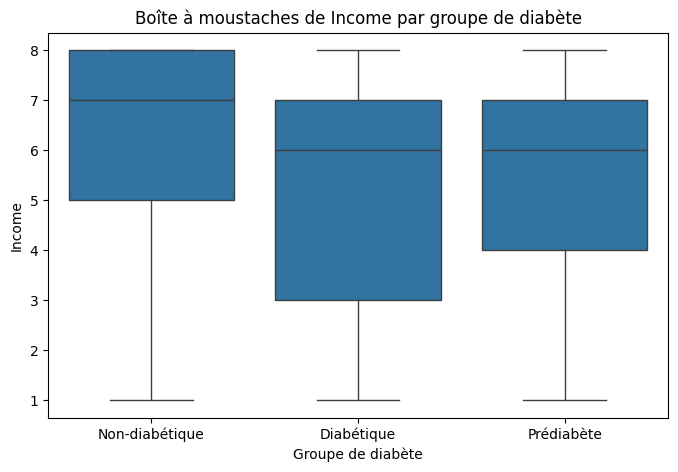

In [7]:
# Boîtes à moustaches (boxplots) pour chaque paramètre numérique par groupe de diabète

for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Diabetes_012', y=feature, data=dataDiabete)
    plt.title(f'Boîte à moustaches de {feature} par groupe de diabète')
    plt.xlabel('Groupe de diabète')
    plt.ylabel(feature)
    plt.show()

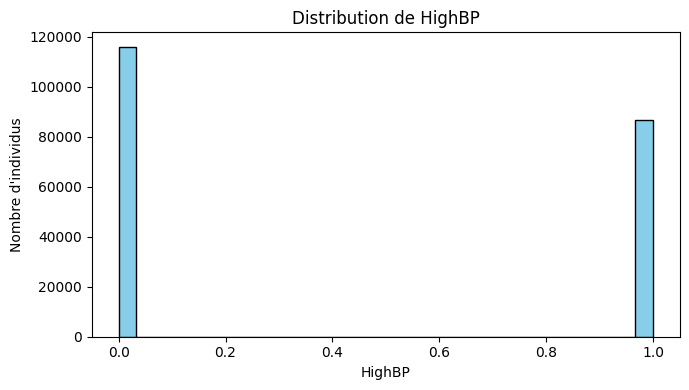

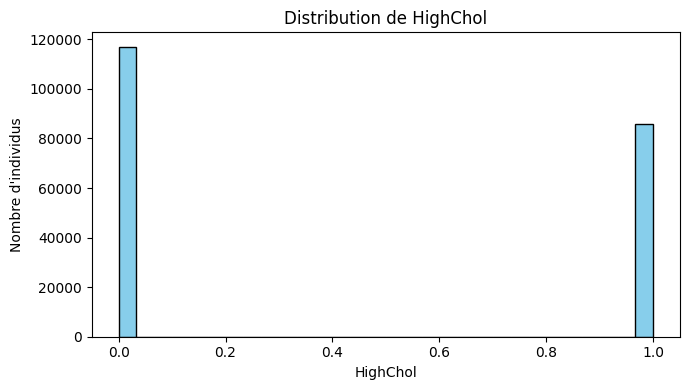

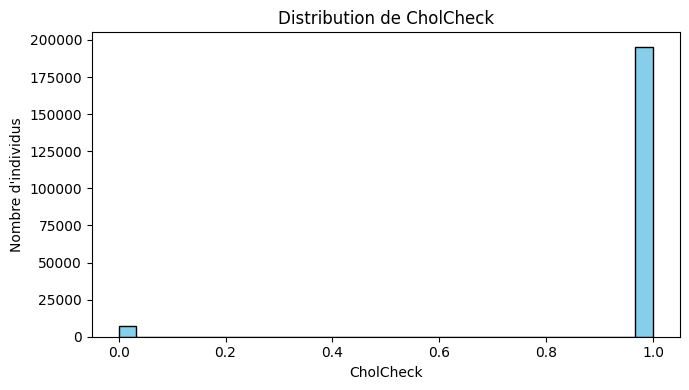

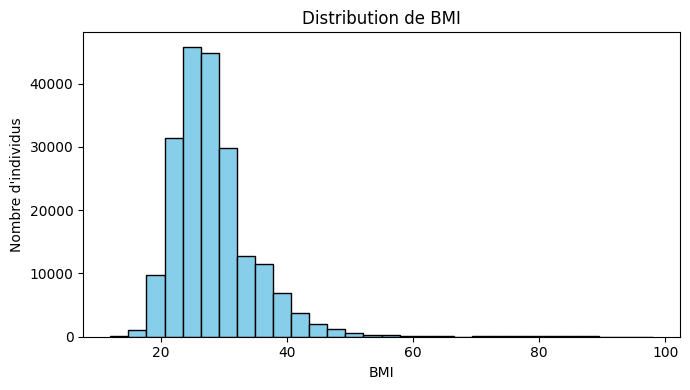

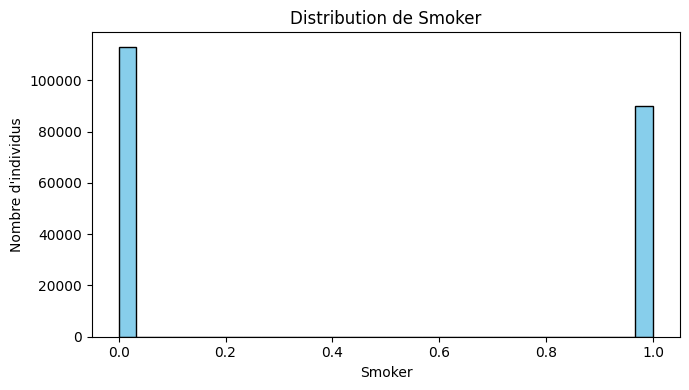

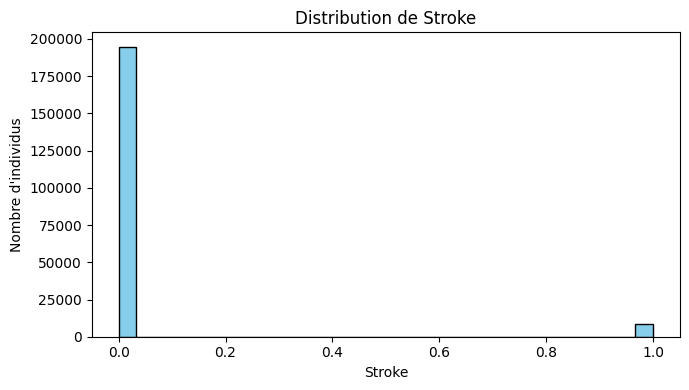

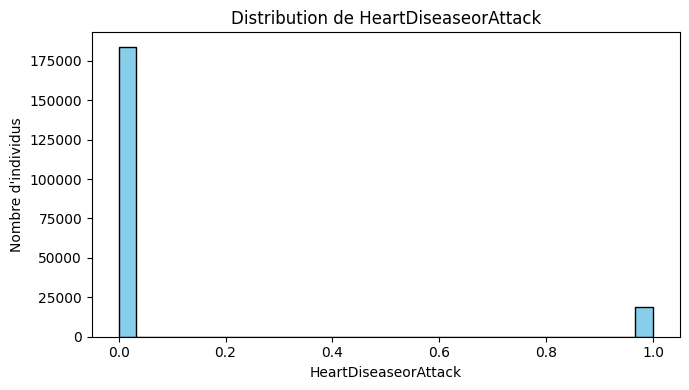

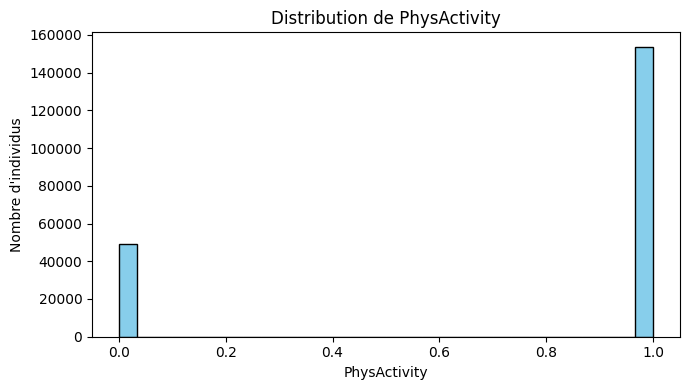

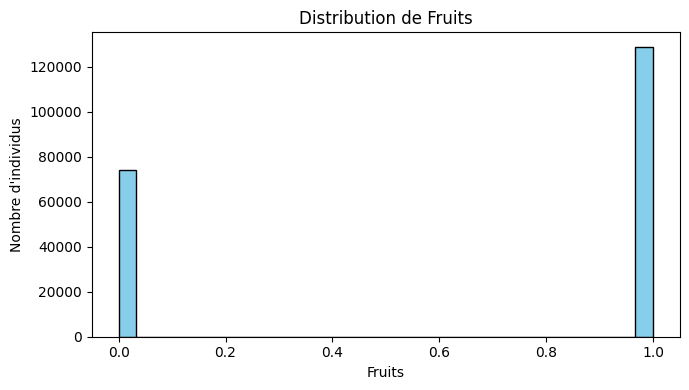

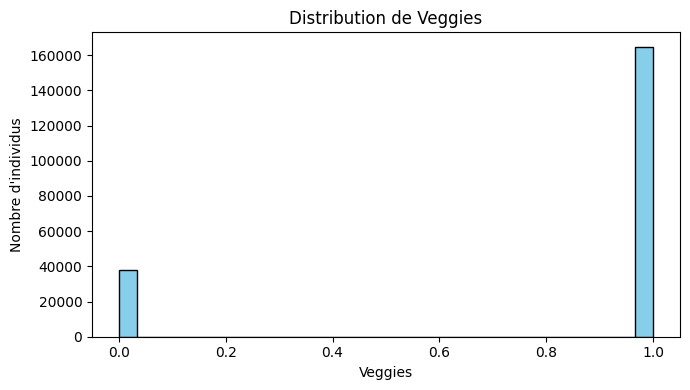

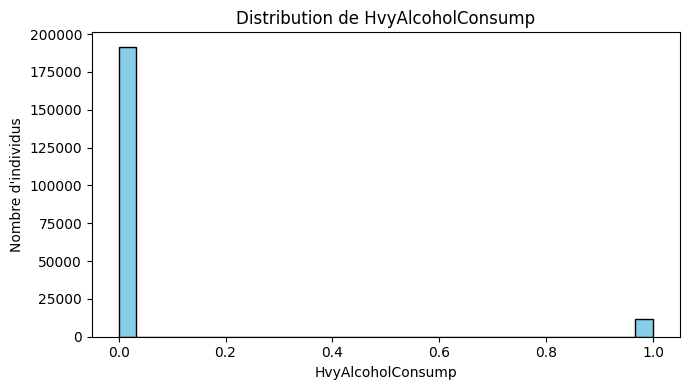

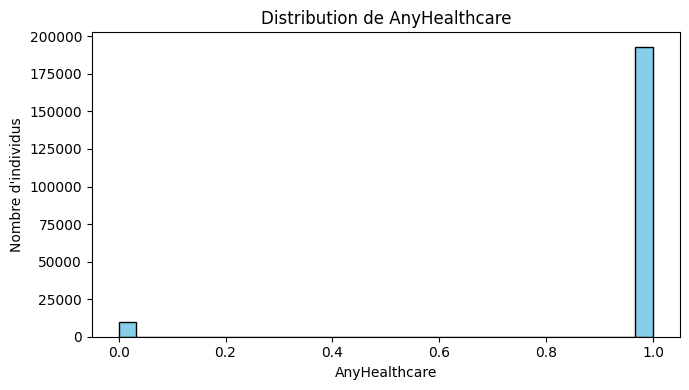

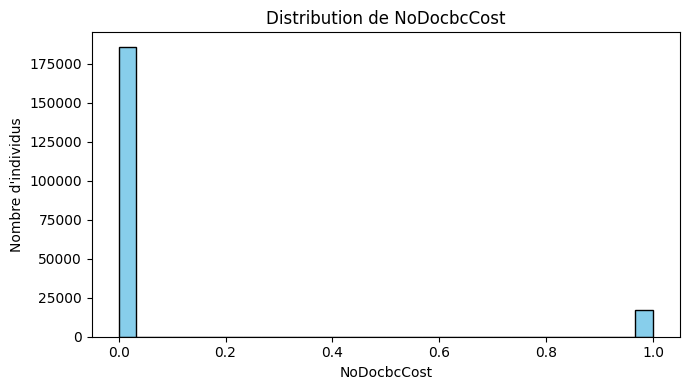

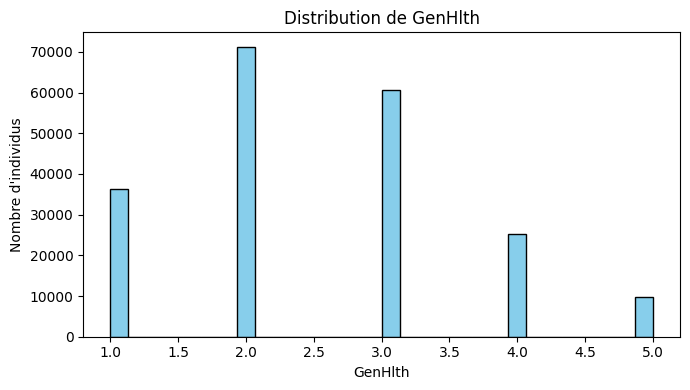

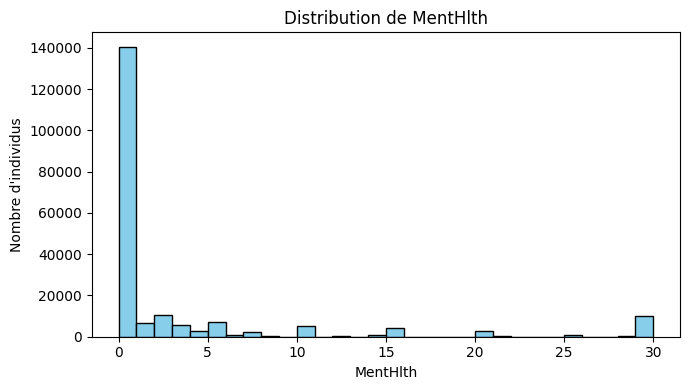

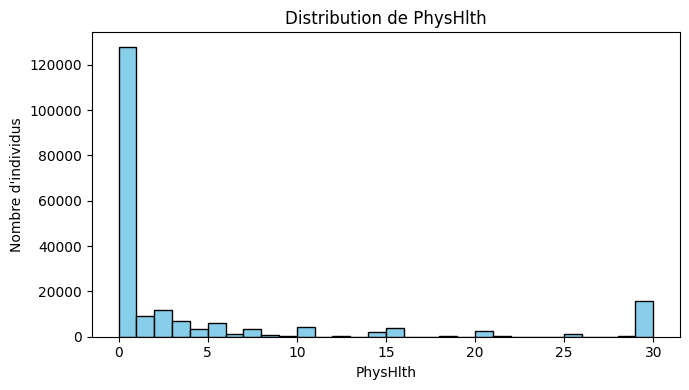

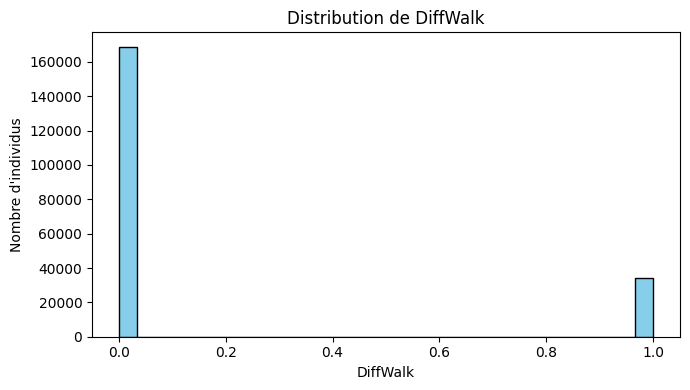

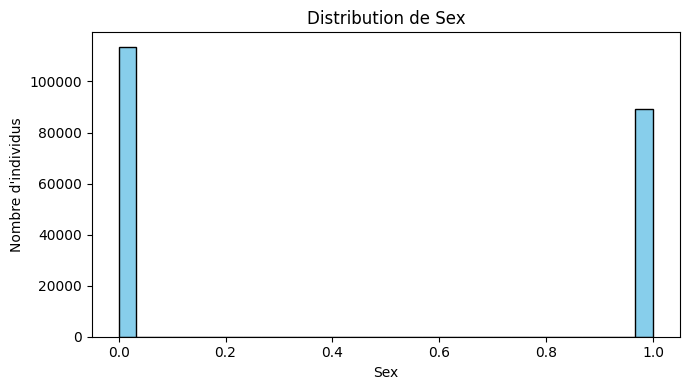

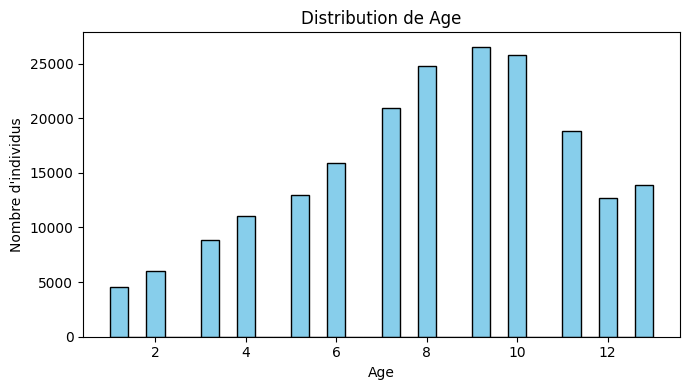

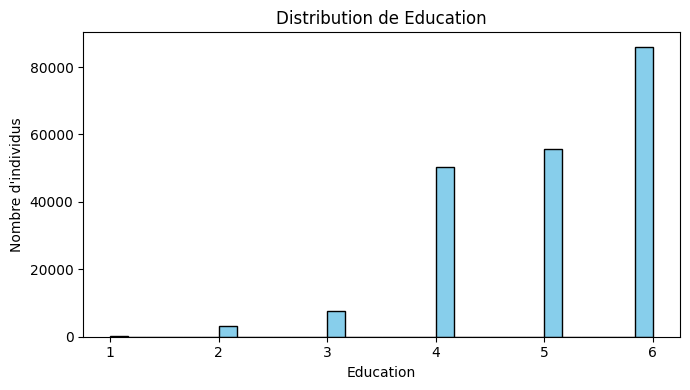

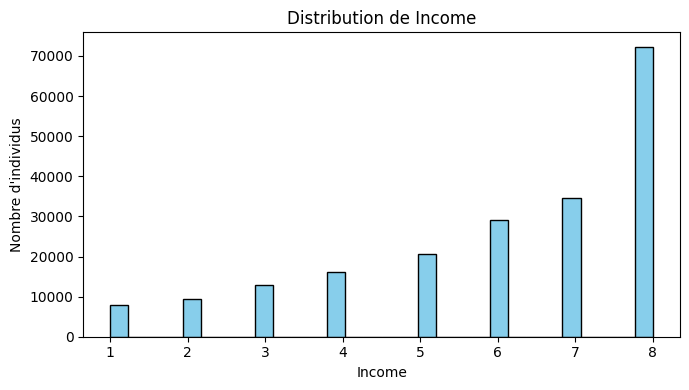

In [8]:
# Affichage de la distribution (histogramme en barres) de chaque caractéristique numérique
for feature in numeric_features:
    plt.figure(figsize=(7, 4))
    plt.hist(train_data[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Nombre d\'individus')
    plt.tight_layout()
    plt.show()

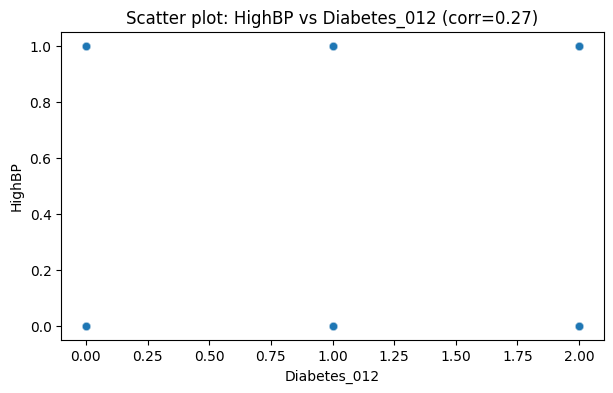

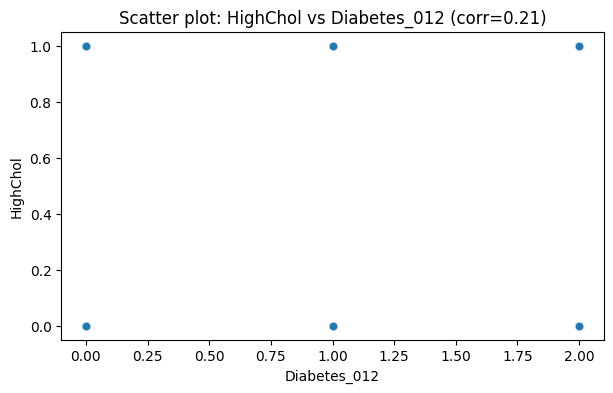

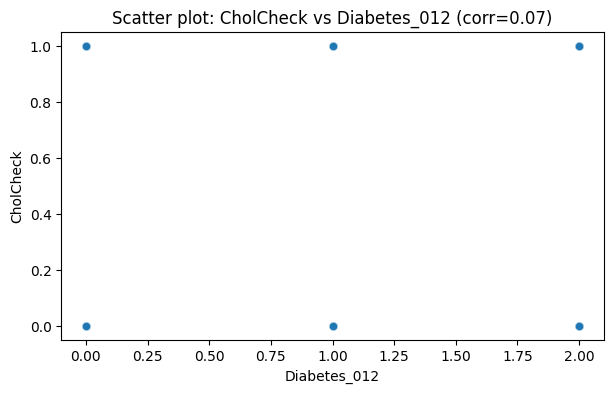

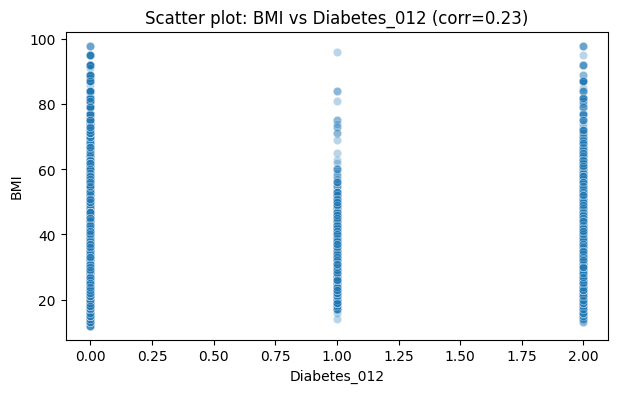

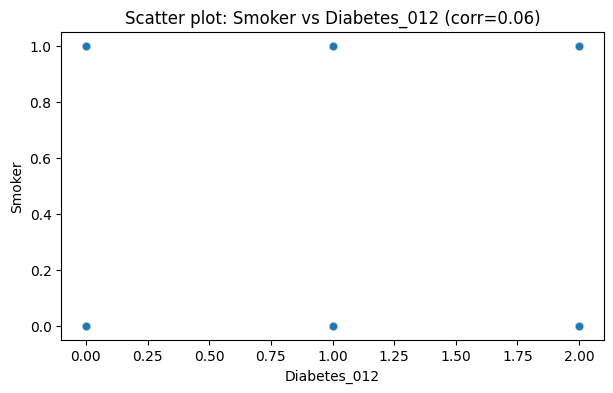

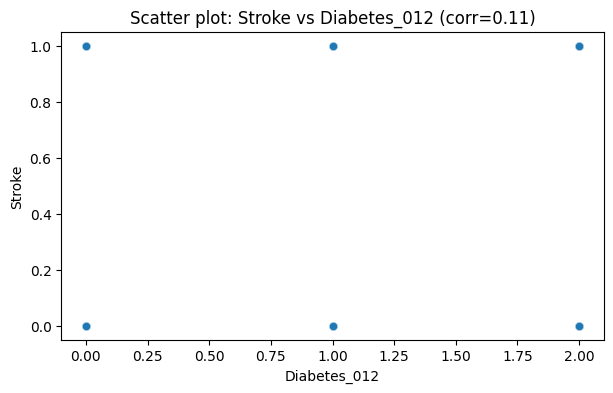

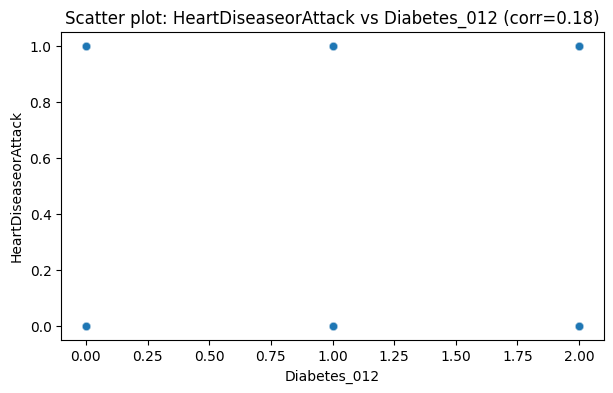

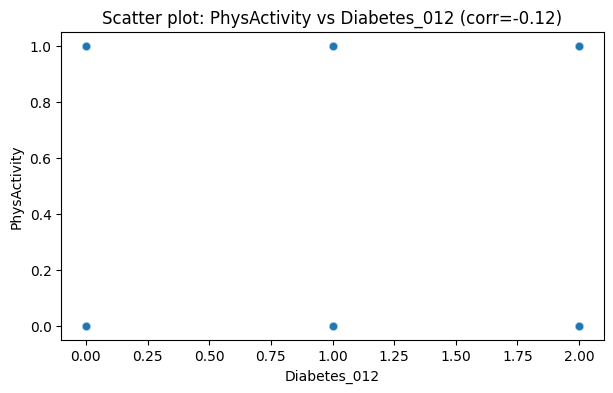

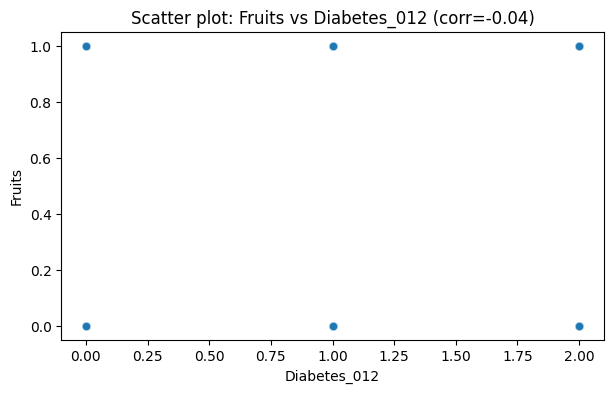

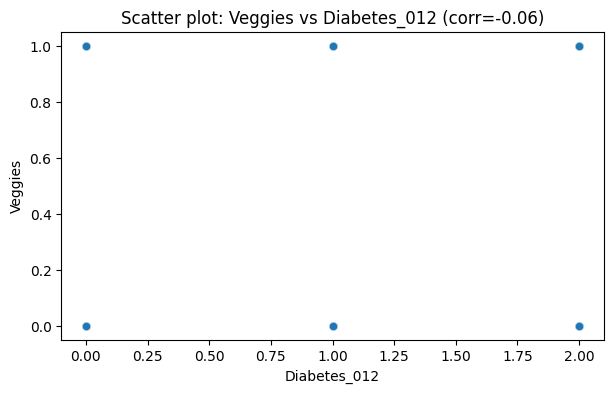

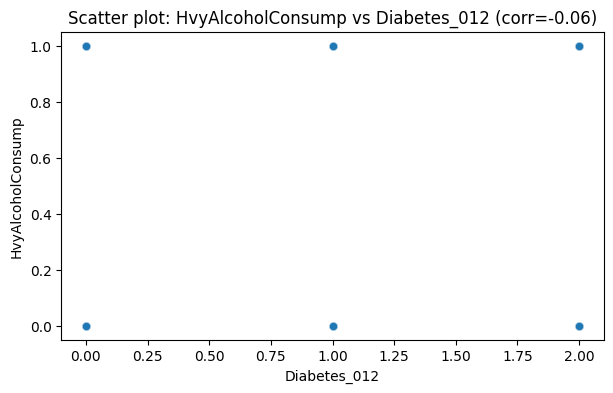

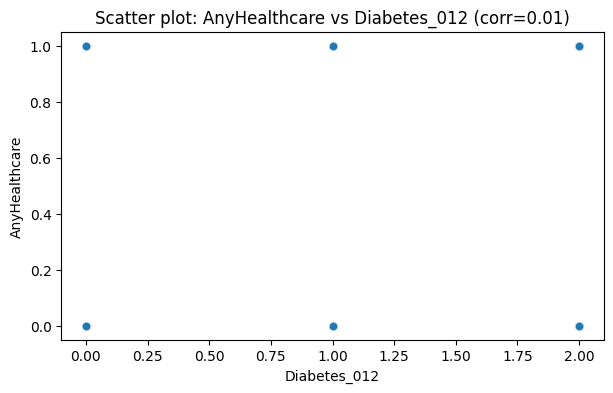

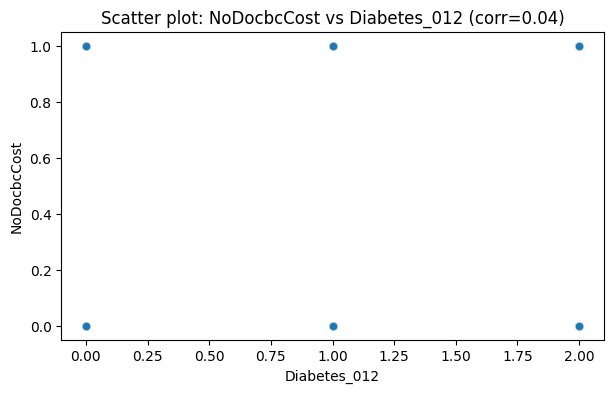

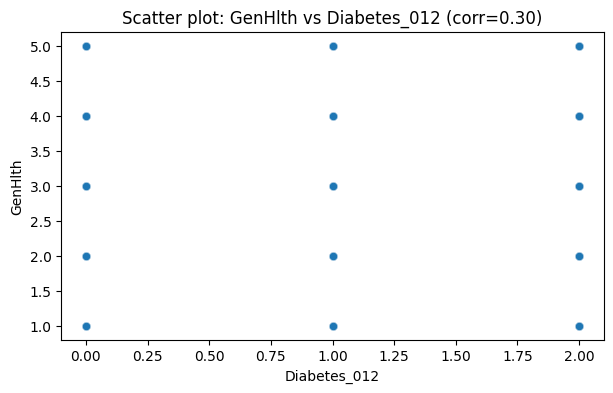

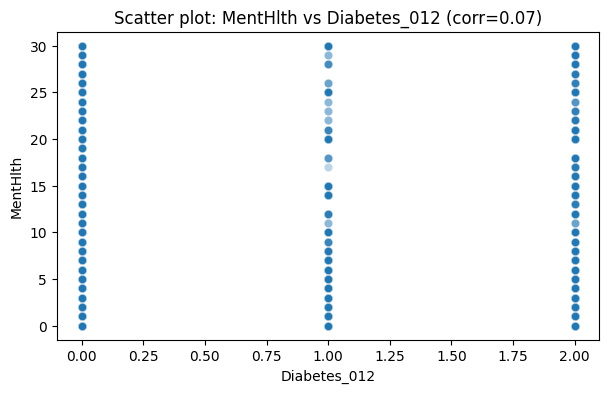

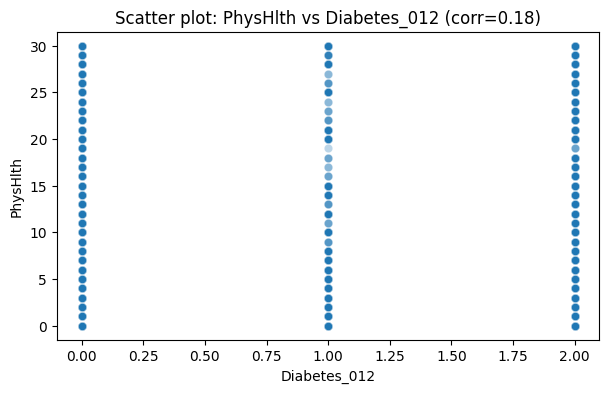

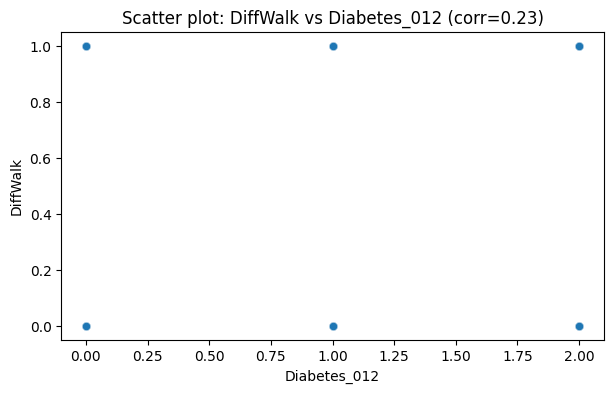

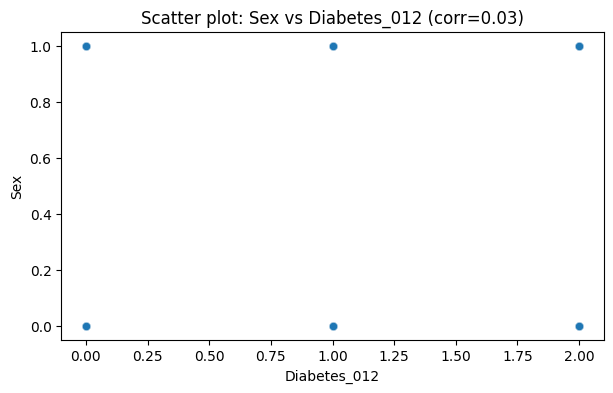

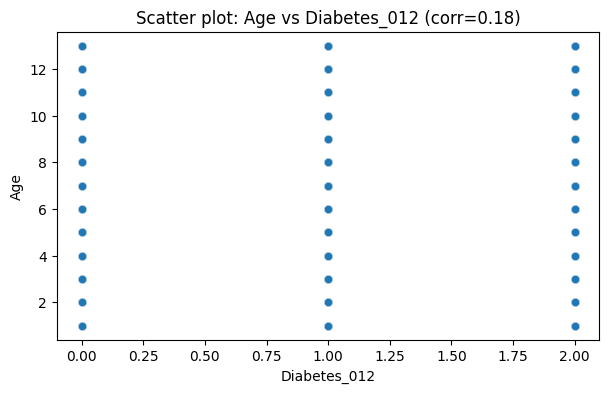

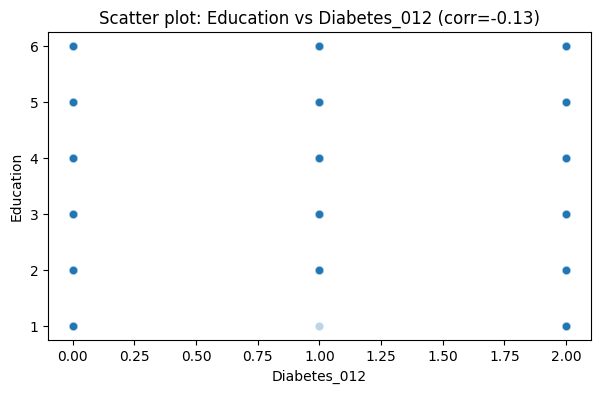

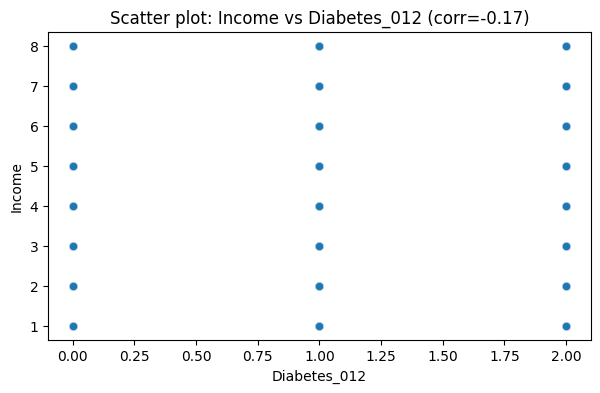

In [9]:
# Nuages de points (scatter plots) pour chaque paramètre numérique par rapport à Diabetes_012

for feature in numeric_features:
    if feature != 'Diabetes_012':
        plt.figure(figsize=(7, 4))
        sns.scatterplot(x='Diabetes_012', y=feature, data=train_data, alpha=0.3)
        corr = corr_matrix.loc['Diabetes_012', feature]
        plt.title(f'Scatter plot: {feature} vs Diabetes_012 (corr={corr:.2f})')
        plt.xlabel('Diabetes_012')
        plt.ylabel(feature)
        plt.show()

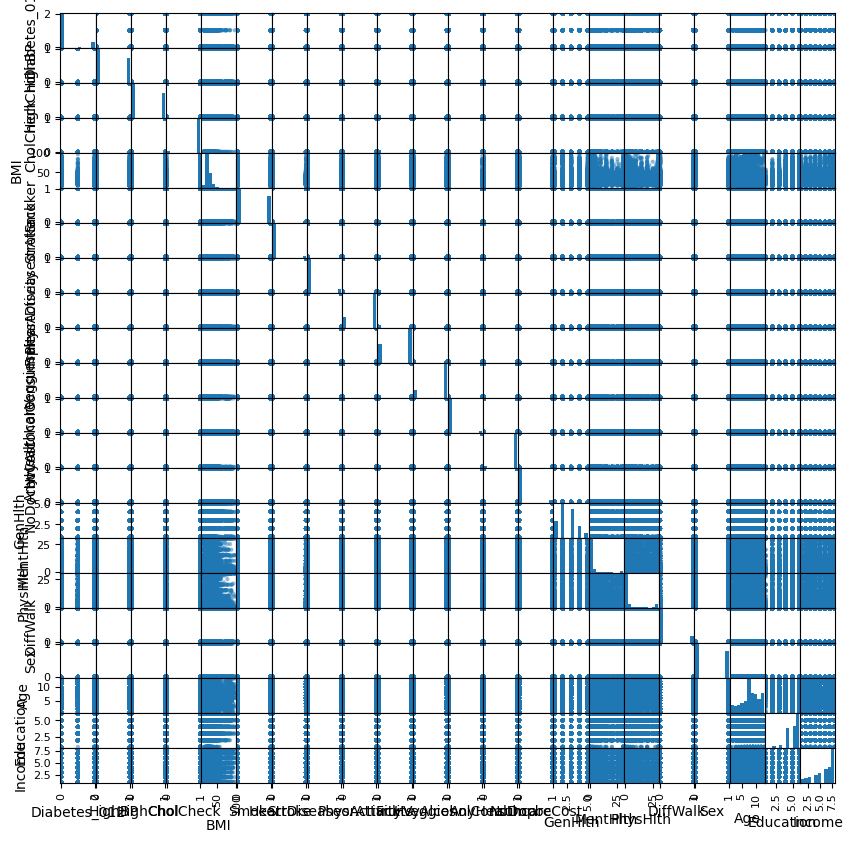

In [10]:
from pandas.plotting import scatter_matrix

sm = scatter_matrix(train_data[train_data.columns],
                   figsize=(10,10))

plt.show()

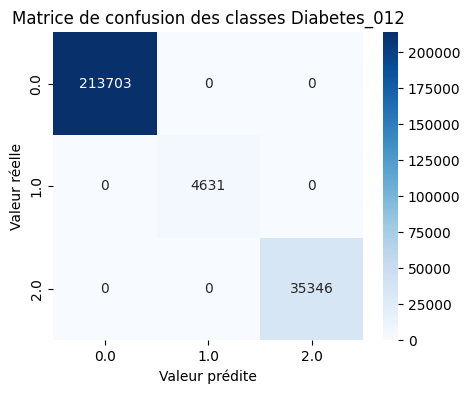

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Créer une matrice de confusion pour les valeurs de Diabetes_012 dans le DataFrame d'origine
labels = [0.0, 1.0, 2.0]
cm = confusion_matrix(data['Diabetes_012'], data['Diabetes_012'], labels=labels)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Valeur prédite')
plt.ylabel('Valeur réelle')
plt.title('Matrice de confusion des classes Diabetes_012')
plt.show()